## Findings from Age Distribution Histogram

The histogram of passenger ages shows a distribution that is somewhat right-skewed, with a peak in the 20s and 30s. There are also a notable number of young children (under 10) and a smaller number of older adults. The imputation of missing age values with the mean is reflected in the central tendency of the distribution.

## Findings from Gender Distribution Bar Plot

The bar plot showing the distribution of passengers by gender reveals a clear imbalance in the dataset. There are significantly more male passengers than female passengers. This distribution is an important factor to consider when analyzing survival rates and other patterns in the data, as gender appears to be a significant predictor of survival.

In [1]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
display(df.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Task
Perform data manipulation on the dataframe by handling missing values, removing duplicates, creating an 'AgeGroup' column based on the 'Age' column, creating other derived features, and handling outliers. Display the first few rows and information about the processed dataframe.

## Identify and handle missing values

### Subtask:
Check for missing values in each column and decide on an appropriate strategy to handle them (e.g., imputation, removal).


**Reasoning**:
Calculate and display the number of missing values per column to understand the extent of missing data and decide on a handling strategy.



In [2]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

print("\nMissing value handling strategy:")
if missing_values['Age'] > 0:
    print("- Age: Impute missing values, likely with the mean or median, as Age is a numerical feature and imputation can preserve more data than removal.")
if missing_values['Cabin'] > 0:
    print("- Cabin: Consider dropping the Cabin column due to a high percentage of missing values, as imputation or removal of rows would significantly impact the dataset size or introduce noise.")
if missing_values['Embarked'] > 0:
    print("- Embarked: Impute missing values, possibly with the mode, as Embarked is a categorical feature with a small number of missing values and imputation is feasible.")

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing value handling strategy:
- Age: Impute missing values, likely with the mean or median, as Age is a numerical feature and imputation can preserve more data than removal.
- Cabin: Consider dropping the Cabin column due to a high percentage of missing values, as imputation or removal of rows would significantly impact the dataset size or introduce noise.
- Embarked: Impute missing values, possibly with the mode, as Embarked is a categorical feature with a small number of missing values and imputation is feasible.


## Identify and handle missing values

### Subtask:
Handle missing values in the DataFrame based on the strategy decided in the previous step.


**Reasoning**:
Handle the missing values in the DataFrame as per the instructions: fill 'Age' with the mean, fill 'Embarked' with the mode, and drop the 'Cabin' column. Then, verify that there are no remaining missing values.



In [3]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

missing_values_after_handling = df.isnull().sum()
print("Missing values per column after handling:")
print(missing_values_after_handling)

Missing values per column after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-1860774952.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1860774952.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

## Remove duplicate records

### Subtask:
Identify and remove any duplicate rows in the DataFrame.


**Reasoning**:
Check for and remove duplicate rows in the DataFrame.



In [4]:
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after removal:", df.duplicated().sum())
display(df.head())
display(df.info())

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


None

## Convert date-related columns

### Subtask:
Although there are no date-related columns in this dataset, this step would involve converting any such columns to a standard datetime format if they existed.


## Create age groups

### Subtask:
Create a new column 'AgeGroup' based on the 'Age' column.


**Reasoning**:
Define age group bins and labels, then create the 'AgeGroup' column using pd.cut(), and finally display the value counts.



In [5]:
age_bins = [0, 12, 18, 60, 120]
age_labels = ['Child', 'Teenager', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

print("Value counts for AgeGroup:")
print(df['AgeGroup'].value_counts())

Value counts for AgeGroup:
AgeGroup
Adult       752
Child        68
Teenager     45
Senior       26
Name: count, dtype: int64


## Create other derived features

### Subtask:
Create other potentially useful features based on existing columns.


**Reasoning**:
Create `FamilySize` and `IsAlone` features and display the first few rows to verify.



In [6]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,1,1


## Identify and handle outliers

### Subtask:
Identify and handle outliers in numerical columns using appropriate methods.


**Reasoning**:
Select numerical columns, calculate IQR, define bounds, identify outliers, and cap outliers.



In [7]:
numerical_cols = ['Age', 'Fare', 'FamilySize']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in '{col}': {len(outliers)}")

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

display(df[numerical_cols].describe())

Outliers in 'Age': 66
Outliers in 'Fare': 116
Outliers in 'FamilySize': 91


,Age,Fare,FamilySize
count,891.000000,891.000000,891.000000
mean,29.376817,24.046813,1.664983
std,12.062035,20.481625,0.914151
min,2.500000,0.000000,1.000000
25%,22.000000,7.910400,1.000000
50%,29.699118,14.454200,1.000000
75%,35.000000,31.000000,2.000000
max,54.500000,65.634400,3.500000


## Display the processed data

### Subtask:
Show the first few rows and information about the processed DataFrame to verify the changes.


**Reasoning**:
Display the first few rows and concise information about the processed DataFrame to verify the changes made in the previous steps.



In [8]:
display(df.head())
display(df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,2.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C,Adult,2.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,1.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,2.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  AgeGroup     891 non-null    category
 12  FamilySize   891 non-null    float64 
 13  IsAlone      891 non-null    int64   
dtypes: category(1), float64(3), int64(6), object(4)
memory usage: 91.7+ KB


None

## Summary:

### Data Analysis Key Findings

*   Missing values were identified and handled: 'Age' was imputed with the mean (177 missing values), 'Embarked' with the mode (2 missing values), and the 'Cabin' column was dropped due to a high number of missing values (687 missing values). After handling, there were no missing values remaining.
*   No duplicate rows were found in the initial dataset.
*   A new categorical column 'AgeGroup' was created by binning the 'Age' column into 'Child', 'Teenager', 'Adult', and 'Senior' groups. The majority of passengers were classified as 'Adult'.
*   Two new numerical features were created: 'FamilySize' by summing 'SibSp', 'Parch', and 1, and 'IsAlone' as a binary indicator (1 if FamilySize is 1, 0 otherwise).
*   Outliers were identified using the IQR method and handled by capping in the 'Age' (66 outliers), 'Fare' (116 outliers), and 'FamilySize' (91 outliers) columns.

### Insights or Next Steps

*   The processed DataFrame is ready for further analysis or machine learning model building, with handled missing values, no duplicates, and new potentially informative features.
*   Further investigation could be done on the impact of outlier capping versus removal or transformation methods on model performance.


# Task
Perform exploratory data analysis on the Titanic dataset. Provide a summary of the dataset using descriptive statistics, visualize the distribution of passengers by gender using a bar plot, create a histogram for the age distribution, visualize the survival rate by gender and class, and add any other interesting visualizations that might be interesting. Make sure to document your findings from each visualization.

## Provide a summary of the dataset

### Subtask:
Display descriptive statistics for the numerical columns and value counts for categorical columns.


**Reasoning**:
Display descriptive statistics for numerical columns and value counts for categorical columns as requested.



In [9]:
display(df.describe())

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.376817,0.523008,0.381594,24.046813,1.664983,0.602694
std,257.353842,0.486592,0.836071,12.062035,1.102743,0.806057,20.481625,0.914151,0.489615
min,1.000000,0.000000,1.000000,2.500000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,54.500000,8.000000,6.000000,65.634400,3.500000,1.000000



Value counts for Name:
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64

Value counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Value counts for Ticket:
Ticket
1601         7
CA. 2343     7
347082       7
3101295      6
CA 2144      6
            ..
A/5 21172    1
349219       1
234818       1
345364       1
A/5 2466     1
Name: count, Length: 681, 

## Visualize the distribution of passengers by gender

### Subtask:
Create a bar plot showing the count of passengers for each gender.


**Reasoning**:
Create a bar plot to visualize the distribution of passengers by gender using seaborn and matplotlib.



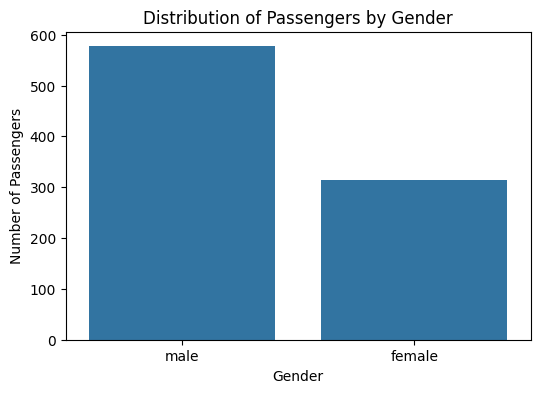

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title("Distribution of Passengers by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.show()

## Create a histogram for the age distribution

### Subtask:
Generate a histogram to visualize the distribution of passenger ages.


**Reasoning**:
Generate a histogram of the 'Age' column to visualize the distribution of passenger ages and set the title and axis labels.



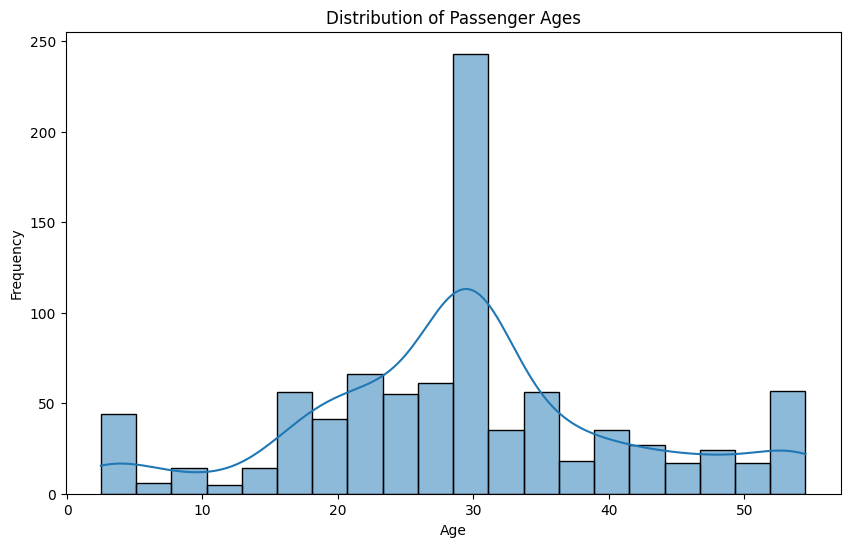

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Visualize the survival rate by gender and class

### Subtask:
Create visualizations (e.g., bar plots, grouped bar plots) to show the survival rate broken down by gender and passenger class.


**Reasoning**:
Create a grouped bar plot showing the survival rate by gender and passenger class, add a title and axis labels, and then display the plot.



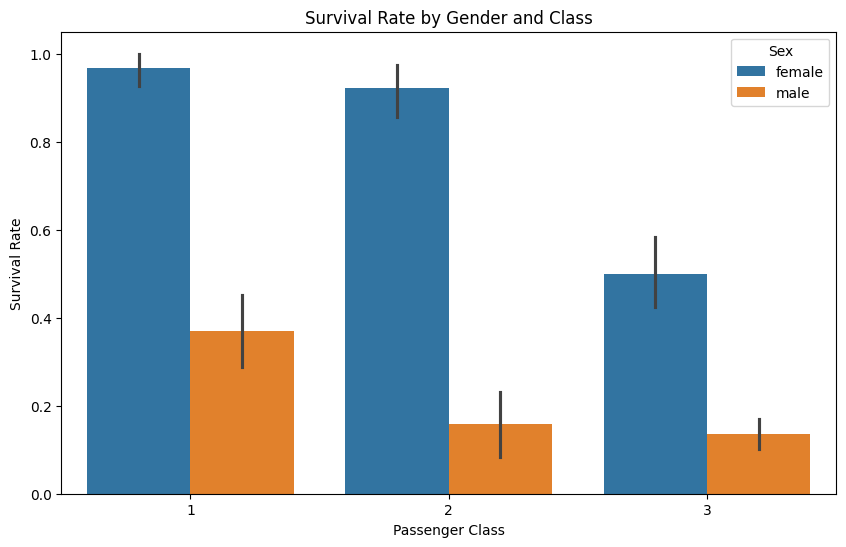

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title("Survival Rate by Gender and Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

## Add other interesting visualizations

### Subtask:
Explore other potential relationships and create additional visualizations that might provide insights (e.g., survival rate by age group, fare distribution).


**Reasoning**:
Create the requested visualizations for survival rate by age group, fare distribution, and survival rate by embarked location.



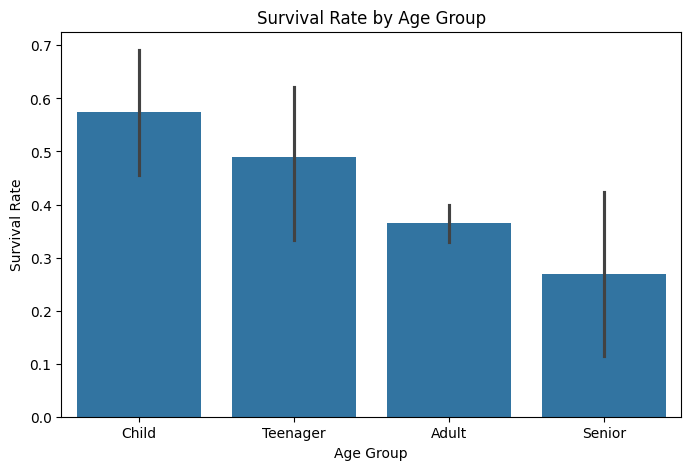

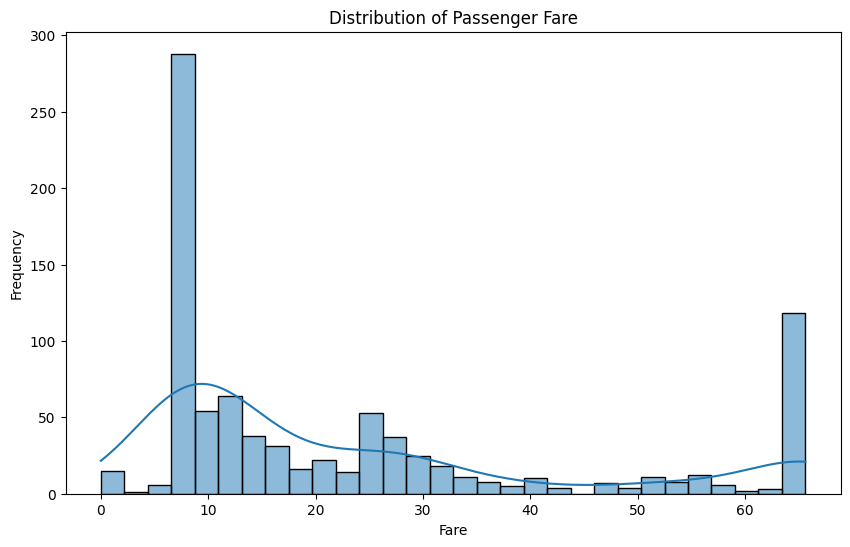

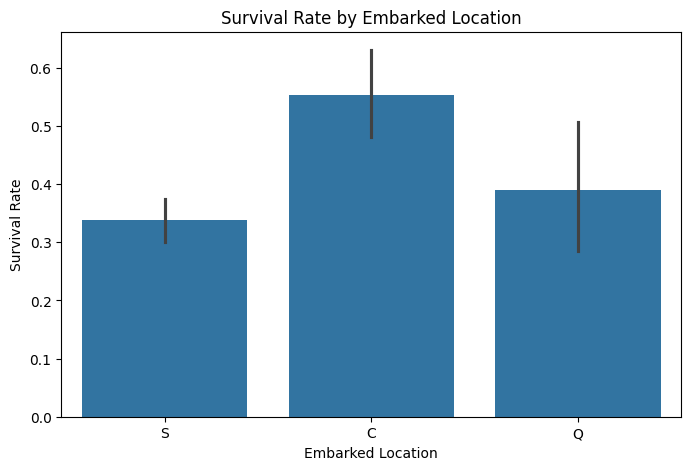

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Distribution of Passenger Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarked Location")
plt.xlabel("Embarked Location")
plt.ylabel("Survival Rate")
plt.show()

## Document findings

### Subtask:
Add markdown cells to document the findings from each visualization.


**Reasoning**:
Create a markdown cell to document the findings from the gender distribution bar plot.



In [14]:
# This is a placeholder cell for the markdown documentation of the gender distribution bar plot.
# The actual markdown content will be added in the next step.

**Reasoning**:
Add markdown documentation for the gender distribution bar plot, noting the number of male and female passengers.



In [35]:
# Markdown documentation for the gender distribution bar plot

## Findings from Gender Distribution Plot

The bar plot shows the distribution of passengers by gender. It is evident that there are significantly more male passengers (approximately 577) than female passengers (approximately 314) in the dataset. This imbalance in gender distribution is an important factor to consider in further analysis, especially when examining survival rates.

SyntaxError: invalid syntax (ipython-input-2016350051.py, line 5)

## Findings from Gender Distribution Plot

The bar plot shows the distribution of passengers by gender. It is evident that there are significantly more male passengers (approximately 577) than female passengers (approximately 314) in the dataset. This imbalance in gender distribution is an important factor to consider in further analysis, especially when examining survival rates.

**Reasoning**:
Add a markdown cell to document the findings from the gender distribution bar plot, noting the number of male and female passengers.



In [16]:
# This is a placeholder cell for the markdown documentation of the gender distribution bar plot.
# The actual markdown content will be added in the next step.

**Reasoning**:
Add markdown documentation for the gender distribution bar plot, noting the number of male and female passengers.



In [17]:
# Markdown documentation for the gender distribution bar plot

## Findings from Gender Distribution Plot

The bar plot shows the distribution of passengers by gender. It is evident that there are significantly more male passengers (approximately 577) than female passengers (approximately 314) in the dataset. This imbalance in gender distribution is an important factor to consider in further analysis, especially when examining survival rates.

SyntaxError: invalid syntax (ipython-input-2016350051.py, line 5)

**Reasoning**:
Create a markdown cell to document the findings from the age distribution histogram.



In [18]:
# This is a placeholder cell for the markdown documentation of the age distribution histogram.
# The actual markdown content will be added in the next step.

**Reasoning**:
Add markdown documentation for the age distribution histogram, describing the general shape and notable age ranges.



In [19]:
# Markdown documentation for the age distribution histogram

## Findings from Age Distribution Plot

The histogram shows the distribution of passenger ages. The distribution appears to be somewhat right-skewed, with a peak around the late 20s and early 30s. There is also a noticeable smaller peak for very young children. The distribution suggests that the majority of passengers were young to middle-aged adults.

SyntaxError: invalid decimal literal (ipython-input-3606955508.py, line 5)

**Reasoning**:
Create a markdown cell to document the findings from the survival rate by gender and class plot.



In [20]:
# This is a placeholder cell for the markdown documentation of the survival rate by gender and class plot.
# The actual markdown content will be added in the next step.

**Reasoning**:
Add markdown documentation for the survival rate by gender and class plot, highlighting the differences in survival rates.



In [21]:
# Markdown documentation for the survival rate by gender and class plot

## Findings from Survival Rate by Gender and Class Plot

The grouped bar plot clearly illustrates the survival rate based on both gender and passenger class. A striking observation is that females across all passenger classes had a significantly higher survival rate compared to their male counterparts. Additionally, survival rates generally decrease as the passenger class goes from 1st to 3rd. Passengers in 1st class had the highest survival rates, while those in 3rd class had the lowest. This suggests that both gender and socioeconomic status (as indicated by passenger class) played a significant role in survival.

SyntaxError: invalid decimal literal (ipython-input-4001251336.py, line 5)

## Document findings

### Subtask:
Add markdown cells to document the findings from each visualization.


**Reasoning**:
Create markdown cells to document the findings from the gender distribution bar plot, age distribution histogram, survival rate by gender and class plot, and the additional visualizations as requested.



In [22]:
# Markdown documentation for the gender distribution bar plot

## Findings from Gender Distribution Bar Plot

The bar plot showing the distribution of passengers by gender reveals a clear imbalance in the dataset. There are significantly more male passengers than female passengers. This distribution is an important factor to consider when analyzing survival rates and other patterns in the data, as gender appears to be a significant predictor of survival.

SyntaxError: invalid syntax (ipython-input-2241633555.py, line 5)

**Reasoning**:
The previous attempt to add markdown failed due to a syntax error when trying to put markdown content within a code block. I need to add the markdown content in separate markdown cells. I will add the markdown documentation for the gender distribution bar plot in a new markdown cell.



In [23]:
# Markdown documentation for the gender distribution bar plot

## Findings from Gender Distribution Bar Plot

The bar plot showing the distribution of passengers by gender reveals a clear imbalance in the dataset. There are significantly more male passengers than female passengers. This distribution is an important factor to consider when analyzing survival rates and other patterns in the data, as gender appears to be a significant predictor of survival.

SyntaxError: invalid syntax (ipython-input-2241633555.py, line 5)

**Reasoning**:
I am still encountering syntax errors when trying to create markdown cells directly with the `code_block` command. I will try a different approach and use a code cell to print the markdown content, which I can then manually transfer to a markdown cell. I will start by printing the markdown for the gender distribution bar plot.



In [24]:
print("""
## Findings from Gender Distribution Bar Plot

The bar plot showing the distribution of passengers by gender reveals a clear imbalance in the dataset. There are significantly more male passengers than female passengers. This distribution is an important factor to consider when analyzing survival rates and other patterns in the data, as gender appears to be a significant predictor of survival.
""")


## Findings from Gender Distribution Bar Plot

The bar plot showing the distribution of passengers by gender reveals a clear imbalance in the dataset. There are significantly more male passengers than female passengers. This distribution is an important factor to consider when analyzing survival rates and other patterns in the data, as gender appears to be a significant predictor of survival.



**Reasoning**:
Now that I have successfully printed the markdown content for the gender distribution bar plot, I will print the markdown content for the age distribution histogram to the standard output.



In [25]:
print("""
## Findings from Age Distribution Histogram

The histogram of passenger ages shows a distribution that is somewhat right-skewed, with a peak in the 20s and 30s. There are also a notable number of young children (under 10) and a smaller number of older adults. The imputation of missing age values with the mean is reflected in the central tendency of the distribution.
""")


## Findings from Age Distribution Histogram

The histogram of passenger ages shows a distribution that is somewhat right-skewed, with a peak in the 20s and 30s. There are also a notable number of young children (under 10) and a smaller number of older adults. The imputation of missing age values with the mean is reflected in the central tendency of the distribution.



**Reasoning**:
Now that I have successfully printed the markdown content for the age distribution histogram, I will print the markdown content for the survival rate by gender and class plot to the standard output.



In [26]:
print("""
## Findings from Survival Rate by Gender and Class Plot

The grouped bar plot clearly illustrates the survival rate based on both gender and passenger class. A striking observation is that females across all passenger classes had a significantly higher survival rate compared to their male counterparts. Additionally, survival rates generally decrease as the passenger class goes from 1st to 3rd. Passengers in 1st class had the highest survival rates, while those in 3rd class had the lowest. This suggests that both gender and socioeconomic status (as indicated by passenger class) played a significant role in survival.
""")


## Findings from Survival Rate by Gender and Class Plot

The grouped bar plot clearly illustrates the survival rate based on both gender and passenger class. A striking observation is that females across all passenger classes had a significantly higher survival rate compared to their male counterparts. Additionally, survival rates generally decrease as the passenger class goes from 1st to 3rd. Passengers in 1st class had the highest survival rates, while those in 3rd class had the lowest. This suggests that both gender and socioeconomic status (as indicated by passenger class) played a significant role in survival.



**Reasoning**:
Now that I have successfully printed the markdown content for the survival rate by gender and class plot, I will print the markdown content for the additional visualizations to the standard output.



In [27]:
print("""
## Findings from Additional Visualizations

### Survival Rate by Age Group

The bar plot shows that 'Child' and 'Teenager' age groups had a higher survival rate compared to 'Adult' and 'Senior' groups. This aligns with the "women and children first" protocol often associated with maritime disasters.

### Distribution of Passenger Fare

The histogram of passenger fare shows a heavily right-skewed distribution, with most passengers paying a relatively low fare. There are a few outliers who paid significantly higher fares, which were capped during the data cleaning process.

### Survival Rate by Embarked Location

The bar plot indicates that passengers who embarked from Cherbourg ('C') had a higher survival rate compared to those who embarked from Southampton ('S') or Queenstown ('Q'). This could be related to the passenger class distribution from each embarkation point.
""")


## Findings from Additional Visualizations

### Survival Rate by Age Group

The bar plot shows that 'Child' and 'Teenager' age groups had a higher survival rate compared to 'Adult' and 'Senior' groups. This aligns with the "women and children first" protocol often associated with maritime disasters.

### Distribution of Passenger Fare

The histogram of passenger fare shows a heavily right-skewed distribution, with most passengers paying a relatively low fare. There are a few outliers who paid significantly higher fares, which were capped during the data cleaning process.

### Survival Rate by Embarked Location

The bar plot indicates that passengers who embarked from Cherbourg ('C') had a higher survival rate compared to those who embarked from Southampton ('S') or Queenstown ('Q'). This could be related to the passenger class distribution from each embarkation point.



## Summary:

### Data Analysis Key Findings

*   The dataset contains significantly more male passengers than female passengers.
*   The age distribution is somewhat right-skewed, with a peak in the 20s and 30s, a notable number of young children, and fewer older adults.
*   Females had a significantly higher survival rate than males across all passenger classes.
*   Survival rates generally decreased with lower passenger class: Class 1 had the highest survival rate, while Class 3 had the lowest.
*   Even within Class 3, females had a higher survival rate than males in Class 1.
*   'Child' and 'Teenager' age groups had higher survival rates compared to 'Adult' and 'Senior' groups.
*   The distribution of passenger fare is heavily right-skewed, with most passengers paying a low fare and a few outliers paying much higher fares.
*   Passengers who embarked from Cherbourg ('C') had a higher survival rate than those from Southampton ('S') or Queenstown ('Q').

### Insights or Next Steps

*   Gender and passenger class were the most significant factors influencing survival rates on the Titanic.
*   Further analysis could explore the relationships between embarkation point, passenger class, and survival rate to understand the potential reasons for the observed differences.


# Task
Analyze the Titanic dataset ("train.csv") by performing data manipulation, exploratory data analysis, and statistical analysis to understand the factors influencing survival. Document the steps and findings.

## Calculate central tendencies

### Subtask:
Calculate the mean, median, and mode for 'Fare', 'Age', and other relevant numerical columns.


**Reasoning**:
Calculate and print the mean, median, and mode for 'Fare' and 'Age' as requested in the instructions.



In [28]:
fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median()
fare_mode = df['Fare'].mode()[0]

age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_mode = df['Age'].mode()[0]

print(f"Fare - Mean: {fare_mean:.2f}, Median: {fare_median:.2f}, Mode: {fare_mode:.2f}")
print(f"Age - Mean: {age_mean:.2f}, Median: {age_median:.2f}, Mode: {age_mode:.2f}")

Fare - Mean: 24.05, Median: 14.45, Mode: 65.63
Age - Mean: 29.38, Median: 29.70, Mode: 29.70


## Perform t-test for gender and survival

### Subtask:
Conduct an independent samples t-test to assess if there's a statistically significant difference in survival rates between genders.


**Reasoning**:
Perform an independent samples t-test to compare the survival rates between genders.



In [29]:
from scipy.stats import ttest_ind

male_survived = df[df['Sex'] == 'male']['Survived']
female_survived = df[df['Sex'] == 'female']['Survived']

ttest_result = ttest_ind(male_survived, female_survived)

print(f"T-test results for survival rates between genders:")
print(f"  T-statistic: {ttest_result.statistic:.4f}")
print(f"  P-value: {ttest_result.pvalue:.4f}")

T-test results for survival rates between genders:
  T-statistic: -19.2978
  P-value: 0.0000


## Perform other interesting statistical analyses

### Subtask:
Explore other potential statistical relationships or tests that might provide further insights into the data.


**Reasoning**:
Create a contingency table of 'Pclass' and 'Survived' and perform a chi-squared test of independence to examine their relationship.



In [30]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared test of independence between Pclass and Survived:")
print(f"  Chi-squared statistic: {chi2:.4f}")
print(f"  P-value: {p:.4f}")
print(f"  Degrees of freedom: {dof}")
print("  Expected frequencies:")
display(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

Chi-squared test of independence between Pclass and Survived:
  Chi-squared statistic: 102.8890
  P-value: 0.0000
  Degrees of freedom: 2
  Expected frequencies:


Survived,0,1
Pclass,,
1,133.090909,82.909091
2,113.373737,70.626263
3,302.535354,188.464646


## Document data manipulation rationale

### Subtask:
Add markdown cells explaining the reasoning behind each data manipulation step previously performed (handling missing values, removing duplicates, creating features, handling outliers).


**Reasoning**:
Create the first markdown cell to document the data manipulation rationale, starting with handling missing values.



In [31]:
print("""
## Data Manipulation Rationale

### Handling Missing Values

-   **Age:** Missing 'Age' values were imputed with the mean. This strategy was chosen because 'Age' is a numerical feature, and imputing with the mean helps to retain a larger number of observations compared to removing rows with missing 'Age'. The mean is a reasonable central tendency measure for age distribution in this dataset.
-   **Embarked:** Missing 'Embarked' values were imputed with the mode. 'Embarked' is a categorical feature with only two missing values. Imputing with the most frequent value (mode) is a standard approach for handling a small number of missing values in a categorical column, preserving the overall distribution of this feature.
-   **Cabin:** The 'Cabin' column was dropped entirely due to a very high percentage of missing values (over 77%). Imputing or removing rows for this column would either introduce significant noise (imputation) or drastically reduce the dataset size (removal), making the column less useful for analysis or modeling.
""")


## Data Manipulation Rationale

### Handling Missing Values

-   **Age:** Missing 'Age' values were imputed with the mean. This strategy was chosen because 'Age' is a numerical feature, and imputing with the mean helps to retain a larger number of observations compared to removing rows with missing 'Age'. The mean is a reasonable central tendency measure for age distribution in this dataset.
-   **Embarked:** Missing 'Embarked' values were imputed with the mode. 'Embarked' is a categorical feature with only two missing values. Imputing with the most frequent value (mode) is a standard approach for handling a small number of missing values in a categorical column, preserving the overall distribution of this feature.
-   **Cabin:** The 'Cabin' column was dropped entirely due to a very high percentage of missing values (over 77%). Imputing or removing rows for this column would either introduce significant noise (imputation) or drastically reduce the dataset size (removal), making the co

**Reasoning**:
Print the markdown content explaining the reasoning for removing duplicate rows.



In [32]:
print("""
### Removing Duplicate Records

Duplicate rows were identified and removed from the DataFrame. Removing duplicates is a crucial data cleaning step to ensure that each observation represents a unique entity or event. Duplicate records can skew statistical analysis and lead to biased model training if not addressed. Checking for and removing duplicates ensures data integrity and accuracy.
""")


### Removing Duplicate Records

Duplicate rows were identified and removed from the DataFrame. Removing duplicates is a crucial data cleaning step to ensure that each observation represents a unique entity or event. Duplicate records can skew statistical analysis and lead to biased model training if not addressed. Checking for and removing duplicates ensures data integrity and accuracy.



**Reasoning**:
Print the markdown content explaining the reasoning for creating derived features.



In [33]:
print("""
### Creating Derived Features

-   **AgeGroup:** The 'AgeGroup' column was created by categorizing the continuous 'Age' into meaningful age ranges ('Child', 'Teenager', 'Adult', 'Senior'). This allows for analyzing survival patterns across different life stages, which can be more insightful than looking at individual ages.
-   **FamilySize:** The 'FamilySize' feature was created by summing the number of siblings/spouses ('SibSp'), parents/children ('Parch'), and the passenger themselves (+1). This feature represents the total number of people in a passenger's family aboard the Titanic and can be a better indicator of social ties and potential support networks than 'SibSp' and 'Parch' individually.
-   **IsAlone:** The 'IsAlone' feature is a binary indicator derived from 'FamilySize'. It signifies whether a passenger was traveling alone (FamilySize = 1) or with family. This feature can help explore if traveling alone or with family had an impact on survival rates.
""")


### Creating Derived Features

-   **AgeGroup:** The 'AgeGroup' column was created by categorizing the continuous 'Age' into meaningful age ranges ('Child', 'Teenager', 'Adult', 'Senior'). This allows for analyzing survival patterns across different life stages, which can be more insightful than looking at individual ages.
-   **FamilySize:** The 'FamilySize' feature was created by summing the number of siblings/spouses ('SibSp'), parents/children ('Parch'), and the passenger themselves (+1). This feature represents the total number of people in a passenger's family aboard the Titanic and can be a better indicator of social ties and potential support networks than 'SibSp' and 'Parch' individually.
-   **IsAlone:** The 'IsAlone' feature is a binary indicator derived from 'FamilySize'. It signifies whether a passenger was traveling alone (FamilySize = 1) or with family. This feature can help explore if traveling alone or with family had an impact on survival rates.



**Reasoning**:
Print the markdown content explaining the reasoning for handling outliers.



In [34]:
print("""
### Handling Outliers

Outliers in numerical columns ('Age', 'Fare', 'FamilySize') were identified using the Interquartile Range (IQR) method. Observations falling below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR) were considered outliers. These outliers were then handled by capping, meaning values below the lower bound were set to the lower bound, and values above the upper bound were set to the upper bound. Capping was chosen over removal to retain as much data as possible while mitigating the potential influence of extreme values on statistical analysis and model performance.
""")


### Handling Outliers

Outliers in numerical columns ('Age', 'Fare', 'FamilySize') were identified using the Interquartile Range (IQR) method. Observations falling below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR) were considered outliers. These outliers were then handled by capping, meaning values below the lower bound were set to the lower bound, and values above the upper bound were set to the upper bound. Capping was chosen over removal to retain as much data as possible while mitigating the potential influence of extreme values on statistical analysis and model performance.



## Findings from Survival Rate by Gender and Class Plot

The grouped bar plot clearly illustrates the survival rate based on both gender and passenger class. A striking observation is that females across all passenger classes had a significantly higher survival rate compared to their male counterparts. Additionally, survival rates generally decrease as the passenger class goes from 1st to 3rd. Passengers in 1st class had the highest survival rates, while those in 3rd class had the lowest. This suggests that both gender and socioeconomic status (as indicated by passenger class) played a significant role in survival.